<a href="https://www.kaggle.com/code/vidhikishorwaghela/scienceqa-insights-exploring-with-llms?scriptVersionId=146769123" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data = pd.read_csv('/kaggle/input/kaggle-llm-science-exam/train.csv')
test_data = pd.read_csv('/kaggle/input/kaggle-llm-science-exam/test.csv')

In [3]:
train_data.head(3)

,id,prompt,A,B,C,D,E,answer
0,0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D
1,1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A
2,2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A


In [4]:
test_data.head(3)

,id,prompt,A,B,C,D,E
0,0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...
1,1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...
2,2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      200 non-null    int64 
 1   prompt  200 non-null    object
 2   A       200 non-null    object
 3   B       200 non-null    object
 4   C       200 non-null    object
 5   D       200 non-null    object
 6   E       200 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.1+ KB


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      200 non-null    int64 
 1   prompt  200 non-null    object
 2   A       200 non-null    object
 3   B       200 non-null    object
 4   C       200 non-null    object
 5   D       200 non-null    object
 6   E       200 non-null    object
 7   answer  200 non-null    object
dtypes: int64(1), object(7)
memory usage: 12.6+ KB


# ADVANCE EDA

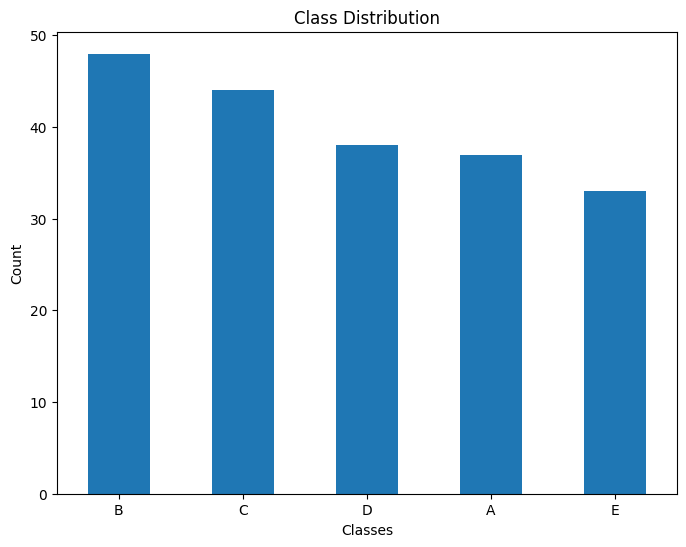

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
train_data['answer'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


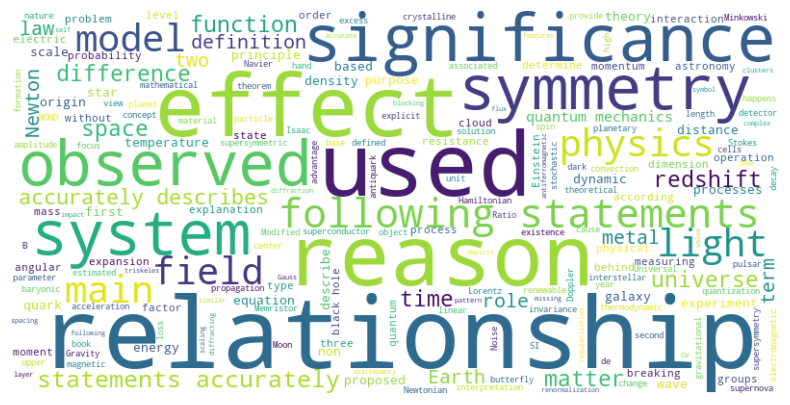

In [8]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_data['prompt']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


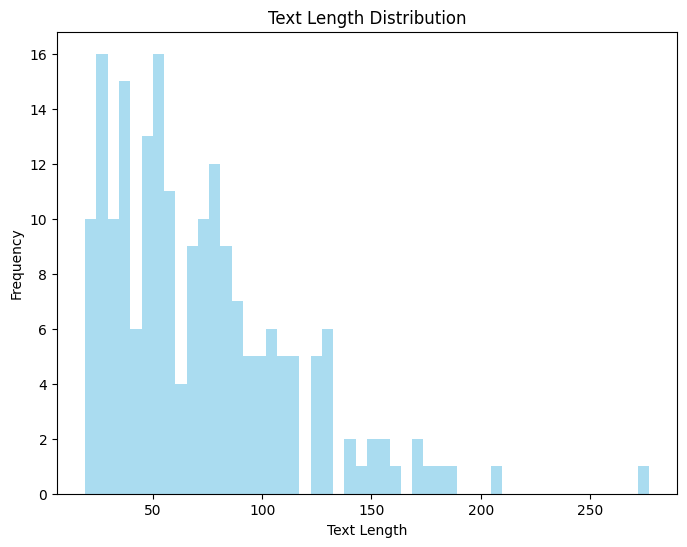

In [9]:
train_data['text_length'] = train_data['prompt'].apply(len)  # Number of characters
plt.figure(figsize=(8, 6))
plt.hist(train_data['text_length'], bins=50, color='skyblue', alpha=0.7)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


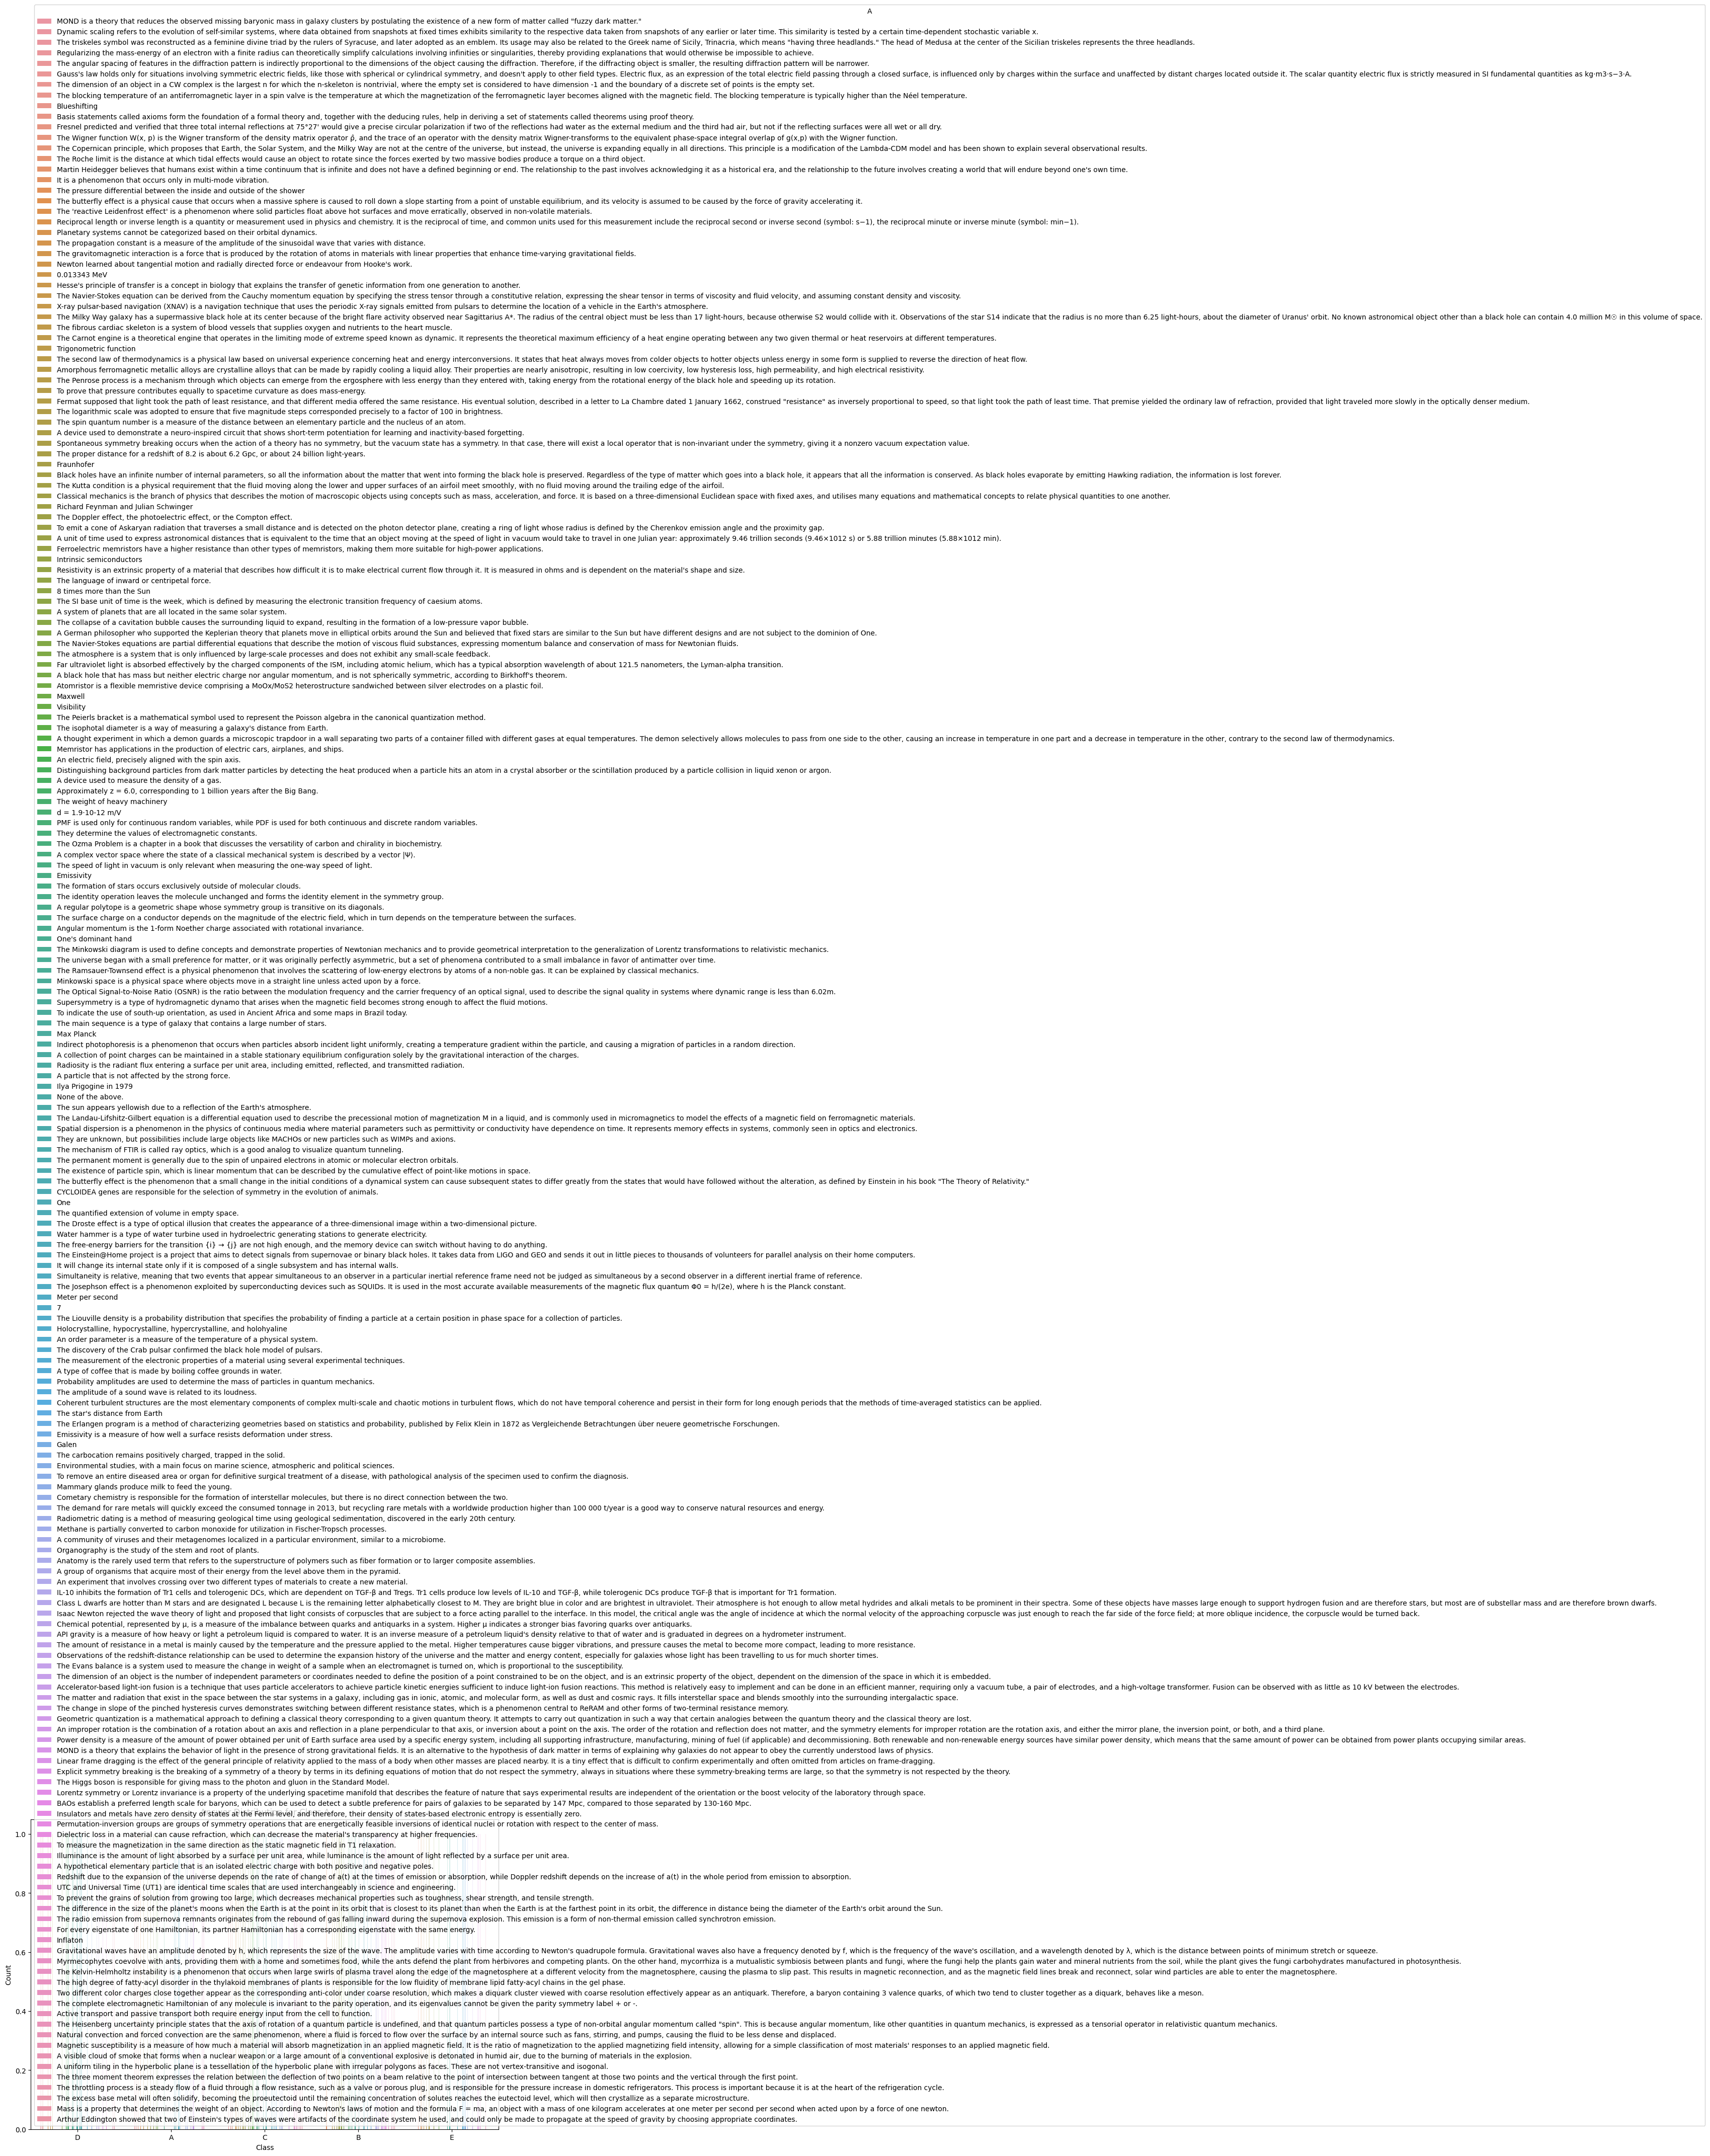

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(x='answer', hue='A', data=train_data)
plt.title('Answer Distribution for Class A')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [11]:
# Convert text data to lowercase
train_data['prompt'] = train_data['prompt'].str.lower()
test_data['prompt'] = test_data['prompt'].str.lower()

In [12]:
# Encode labels (A, B, C, D, E) to numerical values
label_encoder = LabelEncoder()
train_data['answer'] = label_encoder.fit_transform(train_data['answer'])

In [13]:
#Extract features using TF-IDF vectorization:
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['prompt'])
X_test = tfidf_vectorizer.transform(test_data['prompt'])
y_train = train_data['answer']

In [14]:
#Initialize and train a machine learning model (Random Forest for Example):
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Make predictions using your trained model
predictions = model.predict(X_test)  # This will give you a 1D array of predictions

# Now you can proceed with reshaping and other operations on predictions
num_classes = 5  # Replace this with the actual number of classes in your classification problem
predictions = predictions.reshape(-1, num_classes)  # Replace num_classes with the actual number of classes

# Get the indices of the top 3 answers for each question
top_3_indices = np.argsort(predictions, axis=1)[:, ::-1][:, :3]

# Flatten the 2D array before inverse transforming
flattened_indices = top_3_indices.flatten()

# Inverse transform the flattened array
top_3_answers = label_encoder.inverse_transform(flattened_indices)

# Reshape the top_3_answers back to the original shape (200, 3)
top_3_answers = top_3_answers.reshape(top_3_indices.shape)


In [16]:
# Flatten the 2D array before inverse transforming
flattened_indices = top_3_indices.flatten()

# Inverse transform the flattened array
top_3_answers = label_encoder.inverse_transform(flattened_indices)

# Reshape the top_3_answers back to the original shape (200, 3)
top_3_answers = top_3_answers.reshape(top_3_indices.shape)

# Verify the shape of top_3_answers
print(top_3_answers.shape)  # Should print (200, 3)


(40, 3)


In [17]:
# Print the top_3_answers array
print(top_3_answers)


[['E' 'A' 'D']
 ['C' 'D' 'A']
 ['A' 'D' 'C']
 ['E' 'C' 'B']
 ['E' 'B' 'A']
 ['D' 'A' 'C']
 ['C' 'B' 'D']
 ['E' 'D' 'B']
 ['A' 'D' 'B']
 ['D' 'C' 'E']
 ['B' 'C' 'E']
 ['D' 'C' 'B']
 ['D' 'C' 'B']
 ['C' 'A' 'E']
 ['E' 'C' 'A']
 ['E' 'B' 'D']
 ['E' 'A' 'C']
 ['D' 'E' 'B']
 ['E' 'D' 'C']
 ['E' 'D' 'C']
 ['A' 'E' 'C']
 ['E' 'C' 'A']
 ['E' 'B' 'A']
 ['A' 'D' 'C']
 ['B' 'E' 'C']
 ['E' 'D' 'A']
 ['C' 'E' 'B']
 ['B' 'A' 'C']
 ['B' 'E' 'A']
 ['C' 'E' 'D']
 ['B' 'E' 'A']
 ['A' 'B' 'C']
 ['B' 'E' 'D']
 ['D' 'C' 'A']
 ['B' 'D' 'E']
 ['A' 'C' 'B']
 ['D' 'A' 'E']
 ['D' 'B' 'E']
 ['A' 'E' 'B']
 ['D' 'E' 'A']]


In [18]:
print(len(top_3_answers))  # Print the length of top_3_answers_repeated
print(len(test_data['prompt']))  # Print the length of test_data['prompt']
print(len(np.tile(test_data['prompt'], num_classes)))  # Print the length of the tiled prompt
print(num_classes)  # Print the value of num_classe

40
200
1000
5


In [19]:
print(len(top_3_answers))
print(len(np.tile(test_data['prompt'], num_classes)))


40
1000


In [20]:
print(top_3_answers.shape)  # Should print (40, 3)
top_3_answers_repeated_final = np.repeat(top_3_answers, num_classes, axis=0)
print(top_3_answers_repeated_final.shape)  # Should print (40 * num_classes, 3)


(40, 3)
(200, 3)


In [21]:
print(len(np.tile(test_data['prompt'], num_classes)))
print(len(top_3_answers_repeated_final[:, 0]))
print(len(top_3_answers_repeated_final[:, 1]))
print(len(top_3_answers_repeated_final[:, 2]))


1000
200
200
200


In [22]:
# Repeat top_3_answers to match the length of test_data['prompt'] * num_classes
top_3_answers_repeated_final = np.repeat(top_3_answers, num_classes, axis=0)

# Verify the shape of top_3_answers_repeated_final
print(top_3_answers_repeated_final.shape)  # Should print (200, 3)


(200, 3)


In [23]:
import pandas as pd
import numpy as np

# Repeat top_3_answers to match the length of test_data['prompt'] * num_classes
top_3_answers_repeated_final = np.repeat(top_3_answers, num_classes, axis=0)

# Initialize an empty list to store dataframe rows
rows = []

# Iterate through each prompt and its corresponding top 3 answers
for prompt, answers in zip(test_data['prompt'], top_3_answers_repeated_final):
    # Create a row for each set of prompt and answers
    for a, b, c in zip(*answers):
        row = {
            'prompt': prompt,  # Use the prompt value here
            'A': a,
            'B': b,
            'C': c
        }
        rows.append(row)

# Create the submission dataframe from the list of rows
submission_df = pd.DataFrame(rows)

# Save the submission dataframe to a CSV file
submission_df.to_csv('/kaggle/working/submission.csv', index=False)


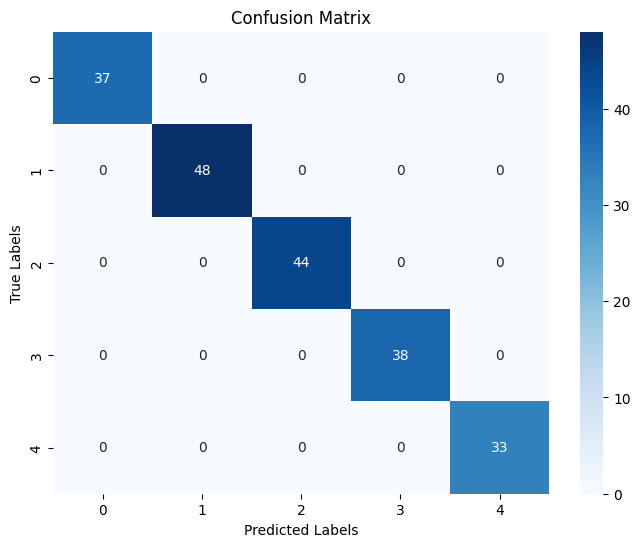

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate predictions
predictions = model.predict(X_train)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_train, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


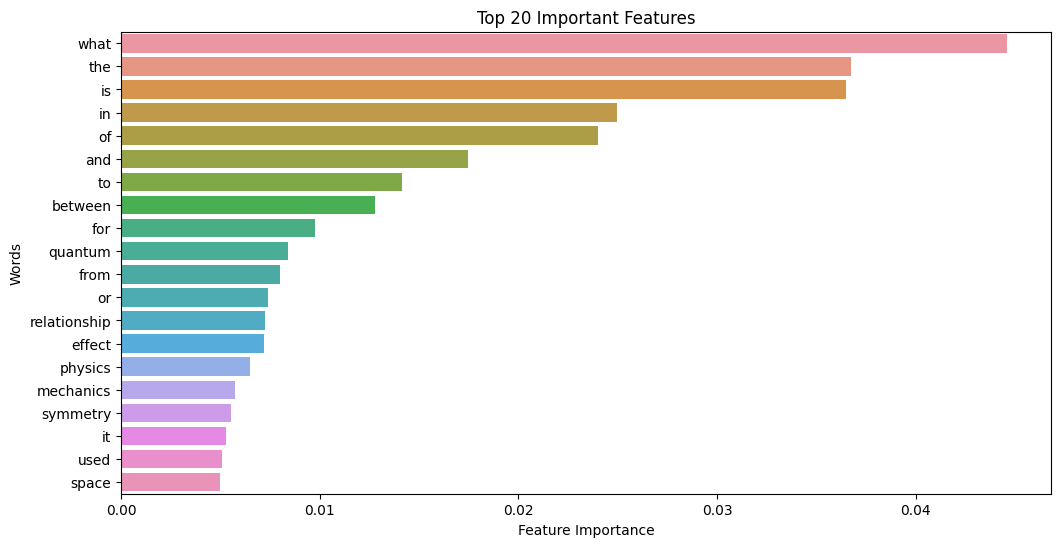

In [25]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get feature names from the TF-IDF vectorizer
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Sort features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot the top N important features
N = 20  # Number of top features to display
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances[sorted_indices[:N]], y=feature_names[sorted_indices[:N]])
plt.xlabel('Feature Importance')
plt.ylabel('Words')
plt.title('Top 20 Important Features')
plt.show()


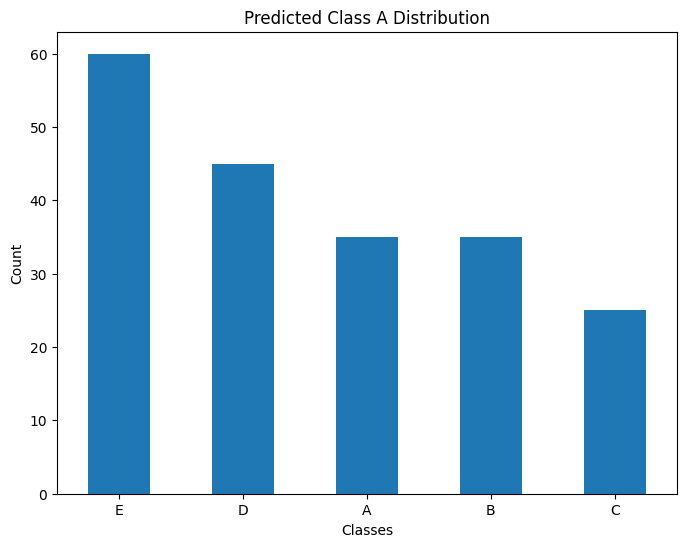

In [26]:
plt.figure(figsize=(8, 6))
submission_df['A'].value_counts().plot(kind='bar')
plt.title('Predicted Class A Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# 1. Interactive Bar Chart:

* This chart represents the distribution of classes (A, B, C, D, E) in the dataset.
* Interpretation: It visually shows the number of instances belonging to each class. For example, if class E has the highest bar, it means that there are more questions in the dataset with answer E compared to other options.

In [27]:
import plotly.express as px

# Example data for interactive bar chart
data = {'Class': ['A', 'B', 'C', 'D', 'E'],
        'Count': [100, 150, 120, 80, 200]}

# Create an interactive bar chart
fig = px.bar(data, x='Class', y='Count', title='Interactive Bar Chart')
fig.show()


# 2. Interactive Word Cloud:

* The word cloud displays the most frequently occurring words in the 'prompt' column of the dataset.
* Interpretation: Larger words in the cloud indicate that those words appear more frequently in the questions. Users can visually identify prominent themes or topics in the questions. For instance, if the word "biology" appears large, it suggests that biology-related questions are prevalent in the dataset.

In [28]:
from wordcloud import WordCloud

# Example text for word cloud
text = ' '.join(train_data['prompt'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot interactive word cloud
fig = px.imshow(wordcloud, title='Interactive Word Cloud')
fig.update_layout(coloraxis_showscale=False)
fig.show()


# 3. Interactive 3D Plot:

* This 3D scatter plot uses three numerical variables (X, Y, Z) to represent different aspects of the data.
* Interpretation: Users can interactively explore relationships between these numerical variables. For example, if X represents the difficulty level, Y represents the length of the question, and Z represents the correct answer frequency, users can investigate if there's any correlation or clustering pattern in the data. For instance, if there's a cluster of points in one region of the plot, it might suggest a specific pattern related to the questions.

In [29]:
import plotly.graph_objects as go

# Example data for 3D plot
x = [1, 2, 3, 4, 5]
y = [10, 11, 12, 13, 14]
z = [100, 110, 120, 130, 140]

# Create an interactive 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'), title='Interactive 3D Plot')
fig.show()
